# World map and highest temperatures 🎨
***  

## Test with one point 

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_7562/4259899614.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


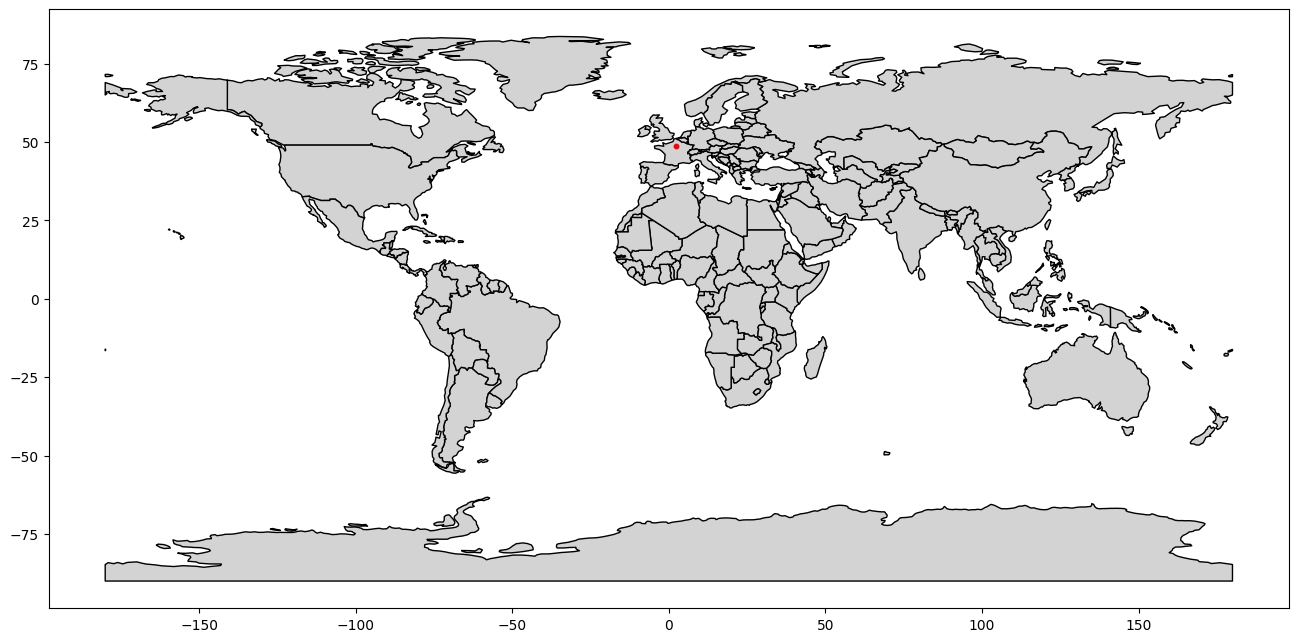

In [1]:
import matplotlib.pyplot as plt
import geopandas as gpd

# Get the map file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the map
ax = world.plot(color='lightgray', edgecolor='black', figsize=(16, 9))

# Latitude and longitude for Paris, France
latitude = 48.8566
longitude = 2.3522

# Plot the dot
ax.scatter(longitude, latitude, color='red', s=10)  

plt.show()

## Plot the map with all the scraped data

In [5]:
import pandas as pd
import requests
from io import BytesIO

# URL of the pickled DataFrame in the GitHub repository
url = "https://raw.githubusercontent.com/Selimmmm/spe1/fff081c86c6c17ae30b96f0f250f2c90cabfd09c/projets/projet_III/data/df_with_coordinates_cleaned.pk"

# Make a request to get the pickled file
response = requests.get(url)

# Convert the binary response content to a BytesIO object
data = BytesIO(response.content)

# Use pandas to read the pickled DataFrame from the BytesIO object
df = pd.read_pickle(data)

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_7562/501487703.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


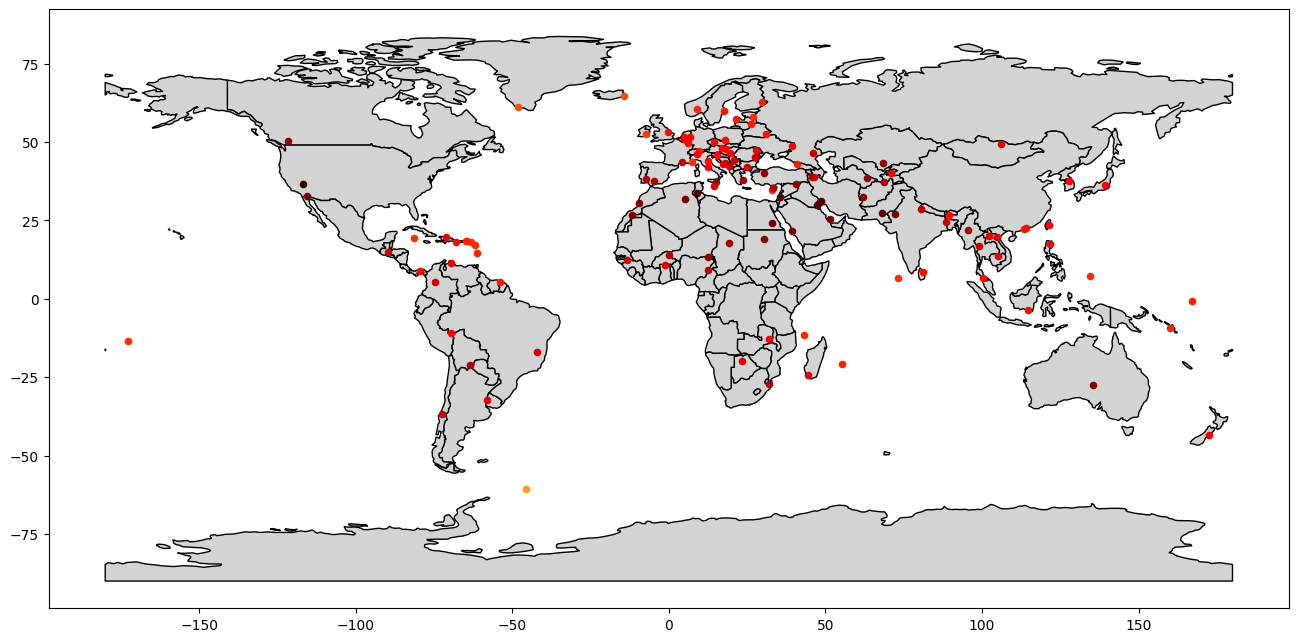

In [3]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# Map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='lightgray', edgecolor='black', figsize=(16, 9))

# One dot per record
for idx, row in df.iterrows():
    # Latitude and longitude for Paris, France
    latitude = row.lat
    longitude = row.long
    color_code = row.color_code
    
    # Plot the dot
    ax.scatter(longitude, latitude, color=color_code, s=20)  

plt.show()

## Create an animation 

/var/folders/yf/7zryq8v115v8hjpz3_522bvm0000gn/T/ipykernel_7562/2417424899.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


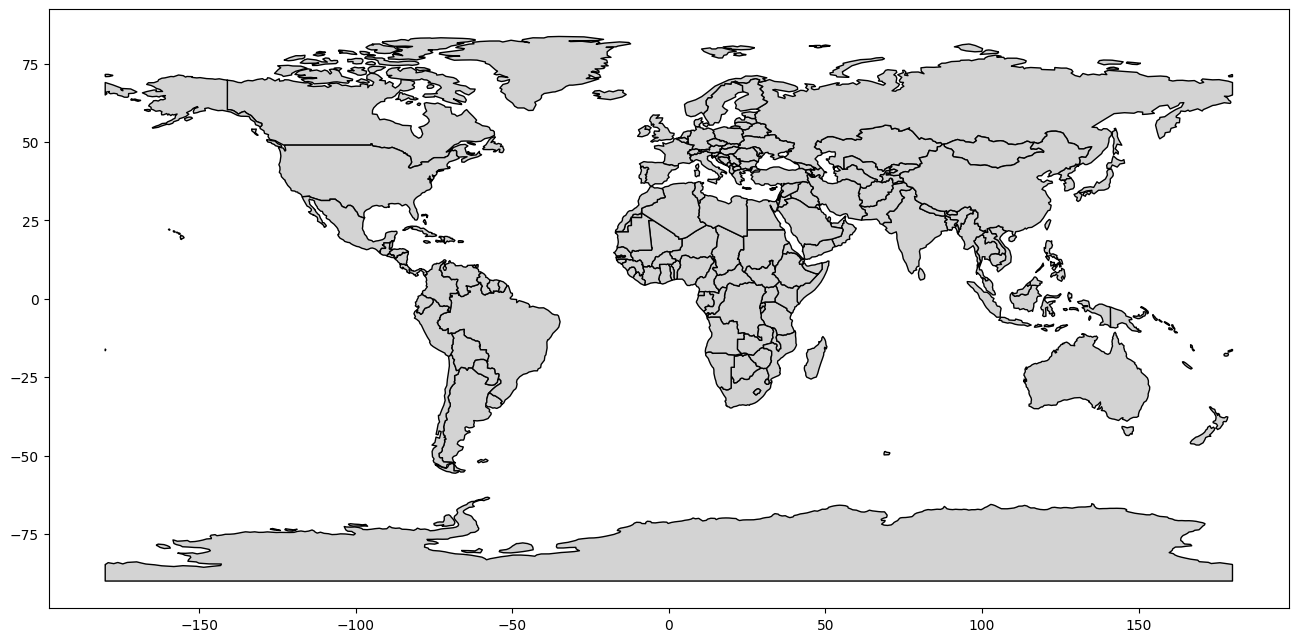

MovieWriter imagemagick unavailable; using Pillow instead.


In [4]:
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from matplotlib.animation import FuncAnimation

df = df[~df.lat.isnull()]

# Sort DataFrame by temperature to ensure progressive display from colder to hotter
df.sort_values('temperature', inplace=True)

# Load map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Set up the plot
fig, ax = plt.subplots(figsize=(16, 9))
world.plot(ax=ax, color='lightgray', edgecolor='black')

# Initialize annotation for temperatures
temp_annotation = ax.annotate('', xy=(0.05, 0.95), xycoords='axes fraction')

# Update function for animation
def update(frame_number):
    row = df.iloc[frame_number]
    # Plot each point on top of the previous points
    ax.scatter(row['long'], row['lat'], color=row['color_code'], s=40)
    place = row.url_suffix[6:]
    temp_annotation.set_text(f"Temperature: {row['temperature']}°C ({place})")
    return ax,

# Create animation
ani = FuncAnimation(fig, update, frames=len(df), blit=False, repeat=False)

# Display the animation
plt.show()

ani.save('animations/animation.gif', writer='imagemagick')